In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt
from datetime import datetime, timedelta

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
from sqlalchemy import func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

C:\Users\ruby_\AppData\Local\Temp\ipykernel_4480\4196587217.py:4: SADeprecationWarning: The AutomapBase.prepare.reflect parameter is deprecated and will be removed in a future release.  Reflection is enabled when AutomapBase.prepare.autoload_with is passed.
  Base.prepare(engine, reflect=True)


In [6]:
# View all of the classes that automap found
all_classes = Base.classes.keys()
print("All Classes:")
for class_name in all_classes:
    print(class_name)

All Classes:
measurement
station


In [7]:
# Save references to each table
measurement = pd.read_csv("Resources/hawaii_measurements.csv")
station = pd.read_csv("Resources/hawaii_stations.csv")

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
last_date = measurement['date'].max()
last_date

'2017-08-23'

In [10]:
measurement['date'] = pd.to_datetime(measurement['date'])

In [11]:
last_date = measurement['date'].max()
last_date

Timestamp('2017-08-23 00:00:00')

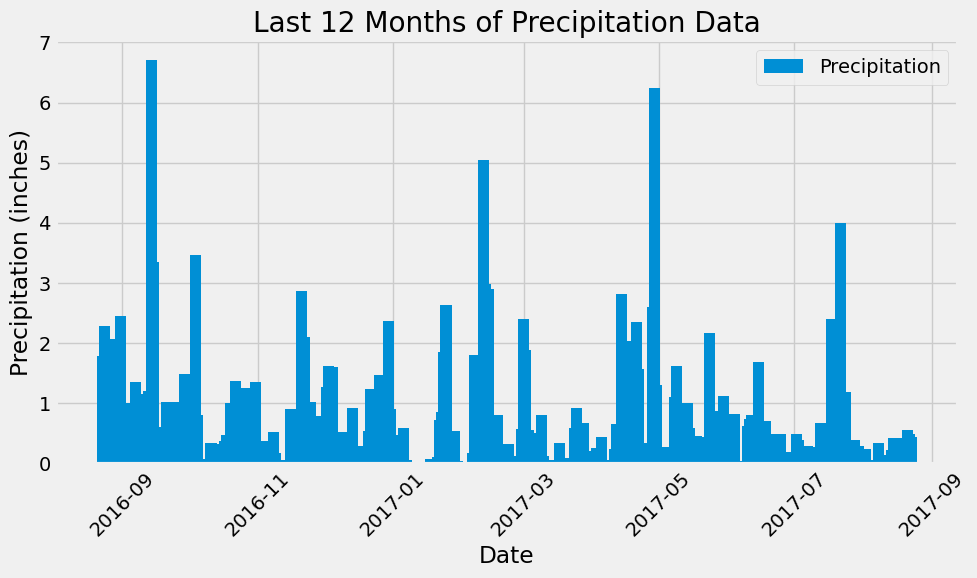

In [12]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in the data set
one_year_ago = last_date - timedelta(days=365)
one_year_ago = one_year_ago.to_pydatetime()
# Perform a query to retrieve the data and precipitation scores for the last 12 months
precipitation_data = measurement.loc[measurement['date'] >= one_year_ago, ['date', 'prcp']]


# Save the query results as a Pandas DataFrame
precipitation_df = pd.DataFrame(precipitation_data, columns=['date', 'prcp'])

# Sort the DataFrame by date
precipitation_df = precipitation_df.sort_values(by='date')

# Use Pandas Plotting with Matplotlib to plot the data

plt.figure(figsize=(10, 6))
plt.bar(precipitation_df['date'], precipitation_df['prcp'], width=5, label='Precipitation')
plt.xlabel('Date')
plt.ylabel('Precipitation (inches)')
plt.title('Last 12 Months of Precipitation Data')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

In [13]:
# Use Pandas to calculate the summary statistics for the precipitation data
summary_statistics = precipitation_df['prcp'].describe()

# Display the summary statistics
print(summary_statistics)

count    2021.000000
mean        0.177279
std         0.461190
min         0.000000
25%         0.000000
50%         0.020000
75%         0.130000
max         6.700000
Name: prcp, dtype: float64


# Exploratory Station Analysis

In [14]:
# Design a query to calculate the total number of stations in the dataset
total_stations = station['station'].nunique()

print(f'The total number of stations in the dataset is: {total_stations}')


The total number of stations in the dataset is: 9


In [15]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
station_counts = measurement['station'].value_counts().reset_index()
station_counts.columns = ['station', 'row_count']

# Display the most active stations in descending order
most_active_stations = station_counts.sort_values(by='row_count', ascending=False)
most_active_stations

,station,row_count
0,USC00519281,2772
1,USC00519397,2724
2,USC00513117,2709
3,USC00519523,2669
4,USC00516128,2612
5,USC00514830,2202
6,USC00511918,1979
7,USC00517948,1372
8,USC00518838,511


In [16]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active_station_id = most_active_stations.iloc[0]['station']

most_active_station_data = measurement[measurement['station'] == most_active_station_id]


lowest_temperature = most_active_station_data['tobs'].min()
highest_temperature = most_active_station_data['tobs'].max()
average_temperature = most_active_station_data['tobs'].mean()

print(f"For the most active station ({most_active_station_id}):")
print(f"Lowest Temperature: {lowest_temperature} °F")
print(f"Highest Temperature: {highest_temperature} °F")
print(f"Average Temperature: {average_temperature:.2f} °F")

For the most active station (USC00519281):
Lowest Temperature: 54 °F
Highest Temperature: 85 °F
Average Temperature: 71.66 °F


C:\Users\ruby_\AppData\Local\Temp\ipykernel_4480\3565757211.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  most_active_station_data['date'] = pd.to_datetime(most_active_station_data['date'])


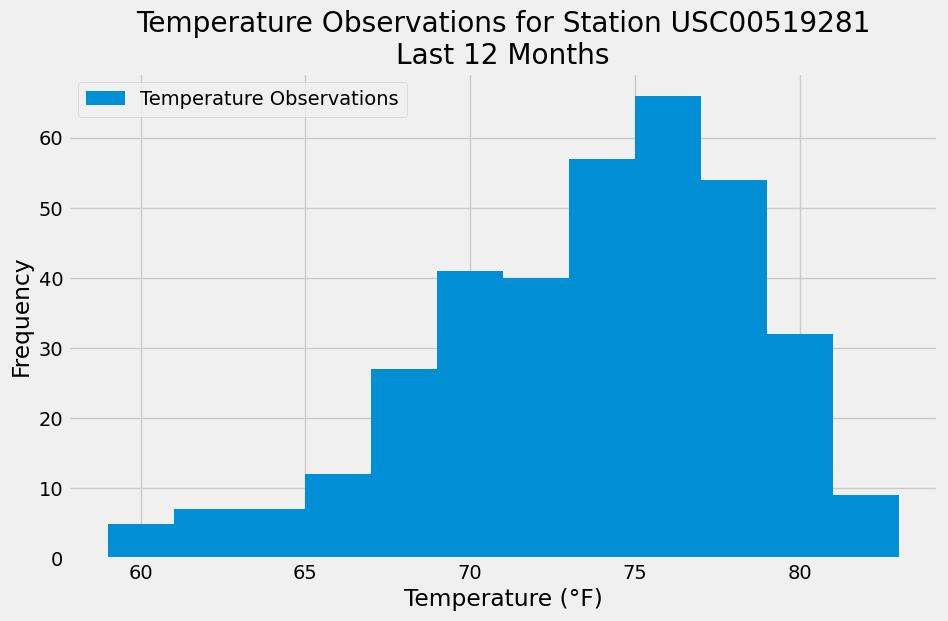

In [17]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
most_active_station_data = measurement[measurement['station'] == most_active_station_id]

# Convert 'date' column to datetime format
most_active_station_data['date'] = pd.to_datetime(most_active_station_data['date'])

# Calculate the date one year from the last date in the data set
last_date = most_active_station_data['date'].max()
one_year_ago = last_date - timedelta(days=365)

# Filter data for the last 12 months
last_12_months_data = most_active_station_data[most_active_station_data['date'] >= one_year_ago]

# Plot the results as a histogram
plt.figure(figsize=(10, 6))
plt.hist(last_12_months_data['tobs'], bins=12, label='Temperature Observations')
plt.xlabel('Temperature (°F)')
plt.ylabel('Frequency')
plt.title(f'Temperature Observations for Station {most_active_station_id}\nLast 12 Months')
plt.legend()
plt.show()

# Close Session

In [18]:
# Close Session
session.close()